# Tugas Akhir 2

<h> Informasi: <h>
    <p>Data hujan harian selama 10 tahun di Australia Memiliki 23 atribut, kolom RainTommorrow adalah target <p>

In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle

%matplotlib inline

In [3]:
#read dataset
df = pd.read_csv("dataset/weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Kolom Date akan kita bagi 3 (tanggal, bulan, tahun).

In [5]:
#membagi kolom date kedalam 3 kolom (tanggal, bulan tahun)
df["Date"] = pd.to_datetime(df["Date"])

df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

df.drop("Date", axis = 1, inplace = True)

In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [7]:
#categorical features
categorical = [col for col in df.columns if df[col].dtype == "O"]
print(categorical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
#check null values di categorical features
df[categorical].isna().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Terlihat banyak null values pada kolom categorical, diputuskan untuk mengisi nilai null tersebut dengan nilai mode pada masing-masing kolom.

In [9]:
#mengganti nilai nul dengna nilai mode dari masing-masing kolom
cat_null = [col for col in categorical if df[col].isnull().sum()]

for var in cat_null:
    df[var] = df[var].fillna(df[var].mode()[0]) 

In [10]:
df[categorical].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [11]:
#numerical features
numerical = [col for col in df.columns if df[col].dtype != "O"]
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


Sebelum mengisi nilai mean kedalam kolom-kolom numerical, akan dicek apakah terdapat outliers pada setiap kolom. Lalu nantinya outliers akan dihapus.

In [12]:
#checking null values di numerical features
num_null = [col for col in numerical if df[col].isnull().sum()]
num_null_val = df[num_null].isnull().sum()
num_null_val

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

<AxesSubplot:>

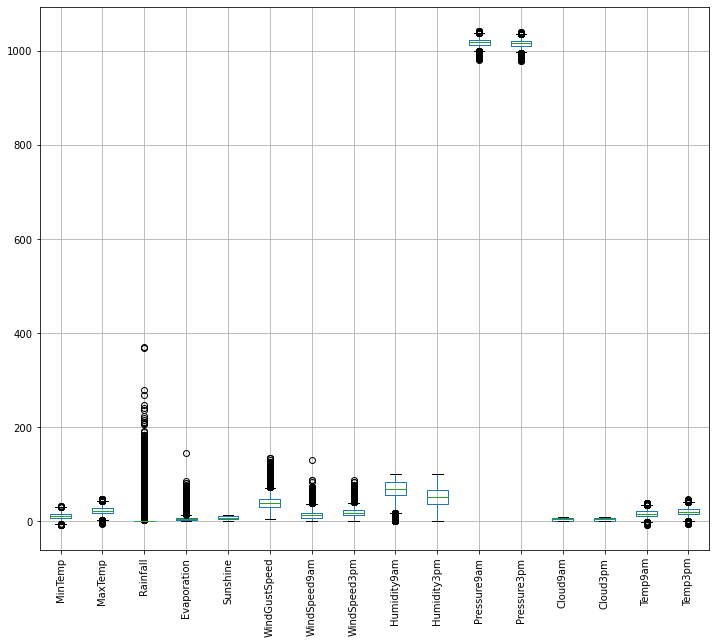

In [13]:
#checking outliers
plt.figure(figsize=(12,10))
df.boxplot(num_null,rot = 90)

In [14]:
#Erase ouliers
for feature in num_null:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

<AxesSubplot:>

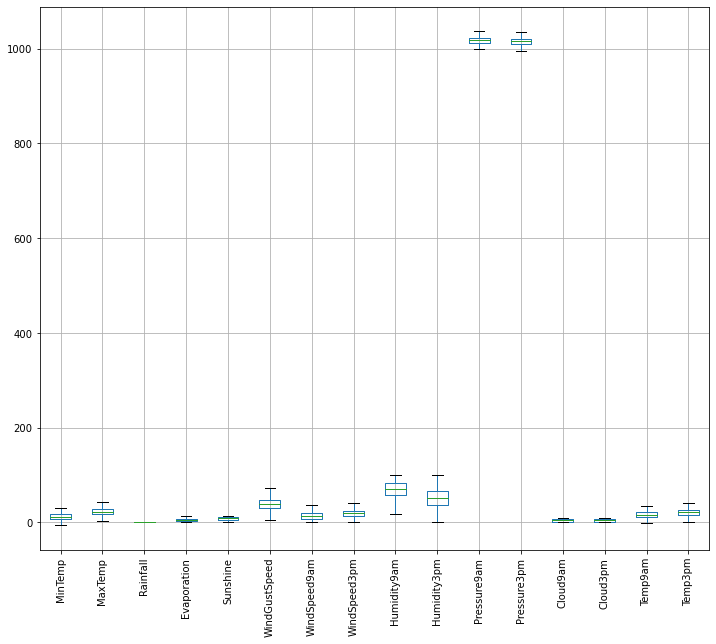

In [15]:
#checking outliers
plt.figure(figsize=(12,10))
df.boxplot(num_null,rot = 90)

In [16]:
#mengganti null values dengan mean dari masing-masing kolom numerical
for features in num_null:
    df[features] = df[features].fillna(df[features].mean())

In [17]:
#mengecek kembali untuk memastikan apakah masih ada nilai null atau tidak
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

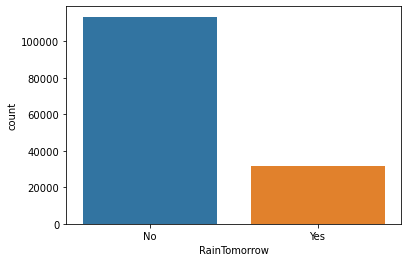

In [18]:
#cek perbandingan jumlah no dan yes pada kolom target
sns.countplot(x = "RainTomorrow", data = df) 

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

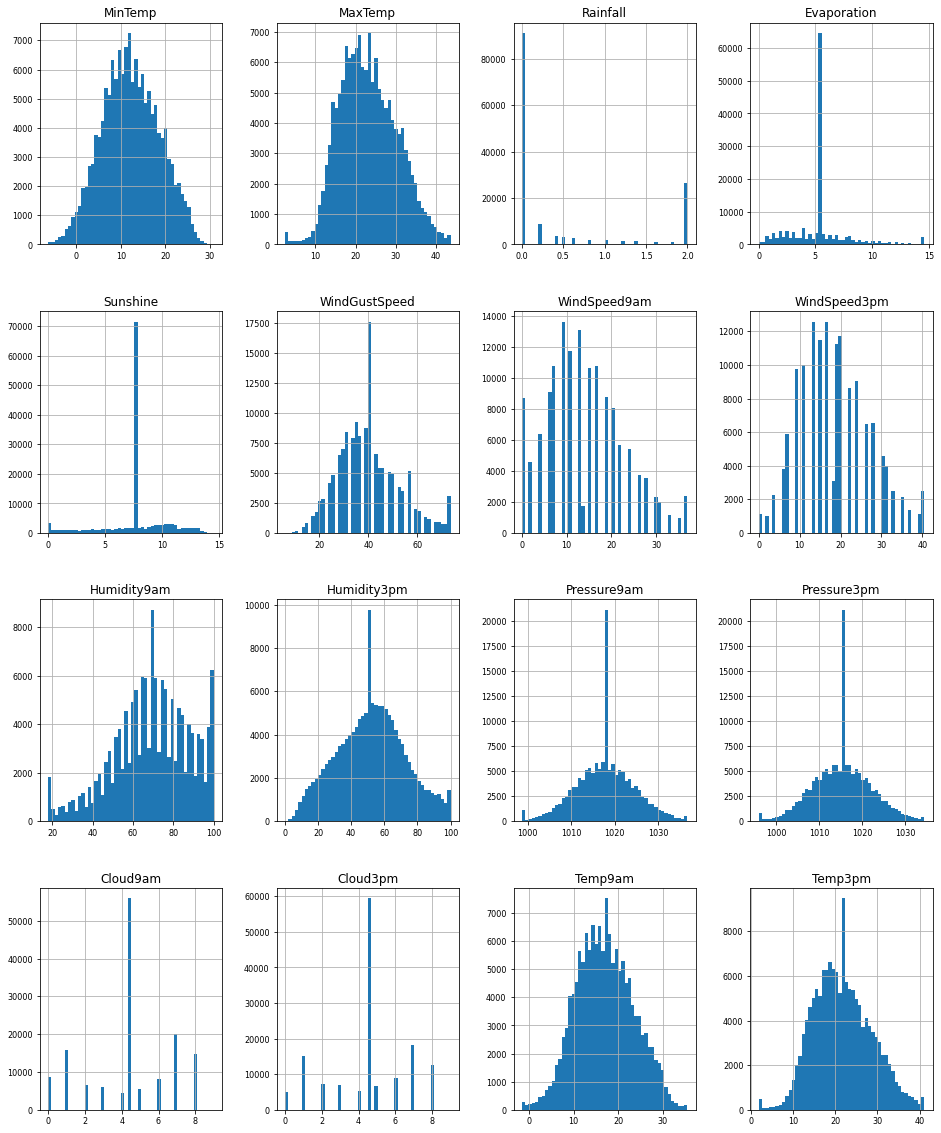

In [19]:
df_num = df.select_dtypes(include = ['float64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [20]:
#encode categorical values
def encoding(feature):
    mapping = {} 
    unique = list(df[feature].unique())
    for index in range(len(unique)): 
        mapping[unique[index]] = index
    return mapping


for category in categorical:
    df[category].replace(encoding(category), inplace = True)
    
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [21]:
x = df.drop(["RainTomorrow"],axis = 1)
y = df["RainTomorrow"]

In [22]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [23]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Memprediksi data test 
    y_pred = model.predict(X_test)

    # Menghitung accuracy, precision, recall, f1-score, dan kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Menghitung daerah dibawah curve
    y_pred_proba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}

In [24]:
#logistic regression
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
eval_logreg = evaluate_model(model_logreg, X_test, y_test)
print('Logistic Regression Accuracy:', eval_logreg['accuracy'])

Logistic Regression Accuracy: 0.8409872129795133


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#SVM model 
model_svm=svm.SVC(probability=True)
model_svm.fit(X_train,y_train)

In [ ]:
eval_svm = evaluate_model(model_svm, X_test, y_test)
print('SVM Accuracy:', eval_svm['accuracy'])

In [ ]:
y_test = model_logreg.predict(X_test)
print("predict response: ", y_test, sep="\n")

In [ ]:
y_test = model_svm.predict(X_test)
print("predict response: ", y_test, sep="\n")

In [ ]:
#menyimpan data ke file model.pkl
pickle.dump(model_logreg, open('model.pkl','wb'))